# **GR Machine Learning and Geostatistics workshop Day 2** 



**Reference: Connor M. Smith and Cary Lidnsey**

**Link to tutorial slides:** 

**Link to dataset: https://raw.githubusercontent.com/connormacs/Geothermal-Rising-ML-GeoStats-Workshop/main/PFA_TSITES.csv**

**bold text**##Part 1: Data Preperation

Outline

*  Introducing the play fairway analysis data
*  preparing data features 
*   PCA exercise
*   Cluster exercise



**Data Preperation Imports**

In [ ]:

import pandas as pd
#numerical python
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1: Standardizing data

PCA and similar learning methods are effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

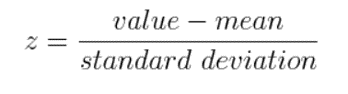

### Standardize data

In [ ]:
#Standardize Data
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1],[3, 3], [2, 2]]
array_data = np.array(data)
x = array_data[:,0]
y = array_data[:,1]
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
print(scaler.mean_)
print(scaler.transform(data))

[1.2 1.2]
[[-1.02899151 -1.02899151]
 [-1.02899151 -1.02899151]
 [-0.17149859 -0.17149859]
 [ 1.54348727  1.54348727]
 [ 0.68599434  0.68599434]]


Check and see!

In [ ]:
scaled_data = scaler.transform(data)
scaled_data = np.array(scaled_data)
u = scaled_data[:,0]
v = scaled_data[:,1]

In [ ]:
#What is the mean of the original data? Standard deviation? 
print(np.mean(data))
print(np.std(array_data))

1.2
1.1661903789690602


In [ ]:
#What about the transformed data?
print(np.std(scaled_data))
print(np.mean(scaled_data))

0.9999999999999999
0.0


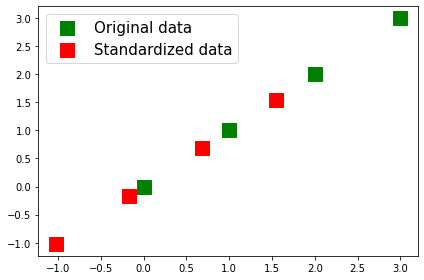

In [ ]:
plt.scatter(x,y, s=200, c='green', marker='s',label = 'Original data')
plt.scatter(u,v, s=200, c='red', marker='s', label = 'Standardized data')
plt.legend(fontsize=15)
plt.tight_layout()

### **Loading Dataset**

We use pandas library to load datapoints from the csv file to the pandas dataframe named `df`.

Columns (2 to 11) contain the normalized play fairway geologic and geophysical data which we want to evaluate.

In [ ]:
# GITHUB link where data is stored 
url = 'https://raw.githubusercontent.com/connormacs/Geothermal-Rising-ML-GeoStats-Workshop/main/PFA_TSITES.csv'

In [ ]:
df = pd.read_csv(url)
df

,Id,QuaternaryFaultDensity,HorizGravityGradient2,GeodeticStrainRate,QuaternarySlipRate,FaultRecency,FaultSlipDilationTendency,Earthquakes,HorizMagneticGradient2,Heatflow,DEM-30m,X_83UTM11,Y_83UTM11,TrainCodeNeg,TrainCodePos,TrainCodePosT130,TrainCodePosT37,NAME,MAX_MAXT,Blind,POWER,E_utm83,N_utm83,Depth(m)
0,6,1.285103,-1.179981,1.327701,-0.875585,-1.595637,0.116588,0.187495,1.161904,0.765071,-0.387379,325827.6902,4261213.766,12,1,12,1,Grant View Hot Springs,53.000000,no,0.0,325910.7938,4261123.388,NaN
1,78,0.200934,3.224230,0.042698,0.925116,-0.450002,-0.557711,0.779572,-0.095253,-1.670693,-0.949648,626327.6902,4262713.766,12,1,1,12,Bacon Flat,130.000000,yes,0.0,626240.6513,4262689.377,NaN
2,27,0.530642,0.346868,1.670390,2.105045,0.760399,-0.140574,2.492251,1.213427,0.415872,-1.109560,356327.6902,4263213.766,12,1,12,1,Hawthorne 1,97.000000,yes,0.0,356239.0985,4263285.061,NaN
3,82,2.520683,-0.845162,-0.276014,-0.920538,-1.178281,-0.632902,1.053704,-0.589872,-1.448916,-0.250680,555077.6902,4263713.766,12,1,1,12,Hot Creek Ranch Hot Spr,160.000000,no,0.0,555117.5865,4263714.281,NaN
4,31,0.328629,3.224230,0.004236,0.698215,-0.420560,-0.177550,0.706009,-0.899009,-1.639976,-0.923856,628327.6902,4269213.766,12,1,12,1,Blue Eagle Springs,41.000000,no,0.0,628207.4400,4269285.723,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,129,-1.524225,-0.743702,-1.113649,2.177095,1.117178,0.726471,-1.542368,-0.950532,0.323909,0.045930,654827.6902,4483713.766,1,12,12,12,Ruby Valley Unit No. 1,-64.323440,NaN,NaN,654886.8122,4483773.277,2743.199912
141,128,-1.398798,-0.867124,-1.398668,3.043991,2.474155,0.837580,-1.200670,-0.785659,0.424091,0.007242,649577.6902,4484713.766,1,12,12,12,FRANKLIN #1,-81.913463,NaN,NaN,649630.3040,4484669.925,3995.700000
142,94,-0.190937,-0.296763,-1.175057,1.453487,-0.001921,0.565689,-0.711823,-0.857791,-0.475900,0.105252,566327.6902,4487713.766,1,12,12,12,Palisades No. 1,-30.218909,NaN,NaN,566387.2295,4487776.287,2897.428707
143,108,-1.365699,0.146387,-1.565202,1.793973,1.123231,-0.988714,-0.966196,-0.754745,-1.402222,-0.397695,609327.6902,4488463.766,1,12,12,12,Huntington Creek No. 1,-15.068856,NaN,NaN,609379.4707,4488430.992,2209.799929


About the dataset: 




*   145 Training sites (83 positive and 62 negative)
*   Positive sites are known geothermal systems (>37C)
*   Negative sites are deep (>1km) and cool (bottom hole temperatures are equal to or below predicted geothermal gradient values)
*   Input data represent unbiased features
*   Data is already standardized!



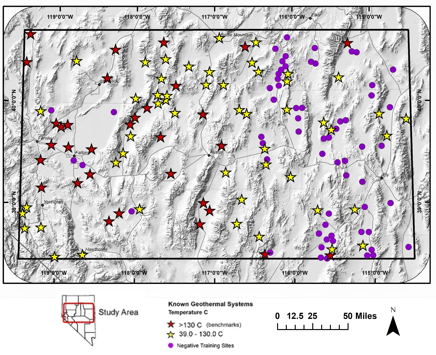

### Split up attributes 
Prepare features 

The first preprocessing step is to divide the dataset into a feature set and corresponding labels

In [ ]:
df.columns

Index(['Id', 'QuaternaryFaultDensity', 'HorizGravityGradient2',
       'GeodeticStrainRate', 'QuaternarySlipRate', 'FaultRecency',
       'FaultSlipDilationTendency', 'Earthquakes', 'HorizMagneticGradient2',
       'Heatflow', 'DEM-30m', 'X_83UTM11', 'Y_83UTM11', 'TrainCodeNeg',
       'TrainCodePos', 'TrainCodePosT130', 'TrainCodePosT37', 'NAME',
       'MAX_MAXT', 'Blind', 'POWER', 'E_utm83', 'N_utm83', 'Depth(m)'],
      dtype='object')

In [ ]:
#Create a dataframe with features
X = df[['QuaternaryFaultDensity', 'HorizGravityGradient2',
       'GeodeticStrainRate', 'QuaternarySlipRate', 'FaultRecency',
       'FaultSlipDilationTendency', 'Earthquakes', 'HorizMagneticGradient2',
       'Heatflow', 'DEM-30m']]
       
#dataframe with attributes
attribute_df = df[['Id','X_83UTM11', 'Y_83UTM11', 'TrainCodeNeg',
       'TrainCodePos', 'TrainCodePosT130', 'TrainCodePosT37', 'NAME',
       'MAX_MAXT', 'Blind', 'POWER', 'E_utm83', 'N_utm83', 'Depth(m)']]

In [ ]:
X.head()

,QuaternaryFaultDensity,HorizGravityGradient2,GeodeticStrainRate,QuaternarySlipRate,FaultRecency,FaultSlipDilationTendency,Earthquakes,HorizMagneticGradient2,Heatflow,DEM-30m
0,1.285103,-1.179981,1.327701,-0.875585,-1.595637,0.116588,0.187495,1.161904,0.765071,-0.387379
1,0.200934,3.224230,0.042698,0.925116,-0.450002,-0.557711,0.779572,-0.095253,-1.670693,-0.949648
2,0.530642,0.346868,1.670390,2.105045,0.760399,-0.140574,2.492251,1.213427,0.415872,-1.109560
3,2.520683,-0.845162,-0.276014,-0.920538,-1.178281,-0.632902,1.053704,-0.589872,-1.448916,-0.250680
4,0.328629,3.224230,0.004236,0.698215,-0.420560,-0.177550,0.706009,-0.899009,-1.639976,-0.923856


In [ ]:
y = df['TrainCodePos'] #.replace({12:0},inplace=True)
y

0       1
1       1
2       1
3       1
4       1
       ..
140    12
141    12
142    12
143    12
144    12
Name: TrainCodePos, Length: 145, dtype: int64

##Exercise 2: Scikit Learn PCA and Clustering

Outline: 

*   PCA reconstruction of features
*   PCA component space plot
*   Truncating PC's
*   Exercise testing different cluster models

###PCA Analysis
Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data.

for more check out: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn.decomposition import PCA
n = len(X.columns)
pcamodel = PCA(n_components=n)
pca = pcamodel.fit_transform(X)

The fit learns some quantities from the data, most importantly the 'components' and 'explained variance'

In [ ]:
#Will output n x n (n are components)
print(pcamodel.components_)

[[ 1.44667026e-01  1.46301327e-01  4.84610000e-01  2.99593903e-01
   4.83821314e-01 -1.49045568e-01  3.22342674e-01  1.79154672e-01
   3.67989736e-01 -3.24574686e-01]
 [-4.20188729e-01  4.54194196e-01 -3.85407536e-01  4.89074383e-01
   2.33473814e-01  8.15539346e-02 -3.61433155e-01 -2.15528104e-02
   1.87306851e-01  4.55299043e-02]
 [-2.25665690e-01 -8.40478659e-01 -1.00926049e-01  1.16701841e-01
   2.70901088e-01  7.25969542e-02 -1.55439609e-01 -5.37069172e-02
   3.33710389e-01  4.24144597e-02]
 [ 6.67237351e-01  1.19125559e-01 -1.49285604e-01 -2.03903597e-01
   2.64016600e-01  4.57872323e-01 -2.96938232e-01 -1.10999706e-01
   2.94453314e-01  1.00958997e-01]
 [-2.22954660e-01  1.36733371e-01  6.35233685e-02 -4.65143937e-01
  -3.36168945e-01 -1.59817907e-01 -2.17153076e-01  3.08938697e-01
   6.46036304e-01 -1.12642348e-01]
 [-9.82282609e-03  8.72124976e-02 -1.59699616e-01 -3.89343037e-01
   4.29885861e-01 -6.34289221e-01 -8.67480810e-02 -4.68922978e-01
  -2.54094506e-02 -4.60724390e-03

In [ ]:
print(pcamodel.explained_variance_)

[2.90235616 1.8164418  1.50277418 0.90201584 0.80114682 0.49201845
 0.42494052 0.29485799 0.22918037 0.15480867]


To see what these numbers mean lets visualize them as vectors over the input data, using the components to define the direction of the vector, and the explained variance to define the squared-length of the vector:

Scree plot of variance explained

<function matplotlib.pyplot.tight_layout>

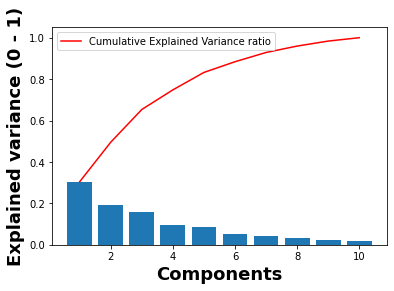

In [ ]:
score = pca[:,0:2]

score[:,0].shape

xs = score[:,0]
ys = score[:,1]

pca.shape
plt.figure(figsize=(6,4))
plt.bar(range(1,len(pcamodel.explained_variance_ratio_ )+1),pcamodel.explained_variance_ratio_) #width=0.5
plt.ylabel('Explained variance (0 - 1)',fontsize = 18,fontweight='bold')
plt.xlabel('Components',fontsize = 18,fontweight='bold')

plt.plot(range(1,len(pcamodel.explained_variance_ratio_ )+1),
         np.cumsum(pcamodel.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left',fontsize = 10)
plt.tight_layout

Examine the feature matrix with loading/weights for features

<function matplotlib.pyplot.tight_layout>

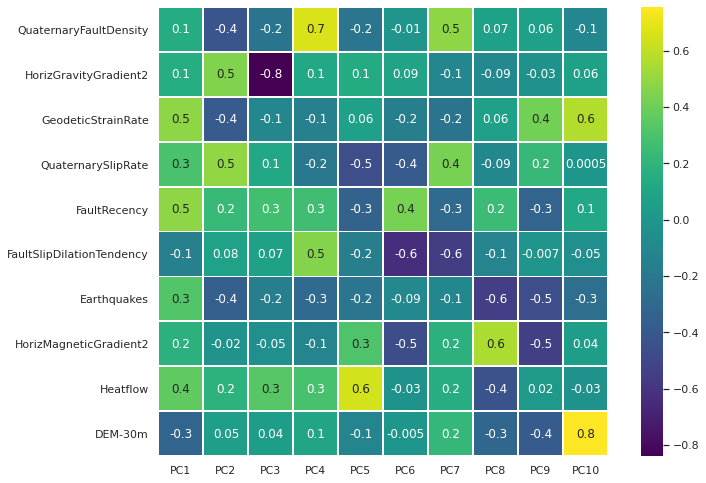

In [ ]:
import seaborn as sns
#we can see influence on each of the components by features.
pcamodel.components_t= pcamodel.components_.transpose()

sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.labelsize":20},style="white")
ax = sns.heatmap(pcamodel.components_t,  cmap = 'viridis',
                  linewidths=.95,
                 xticklabels=([ "PC"+str(X) for X  in range(1,pcamodel.n_components_+1)]),
                 yticklabels=list(X.columns), 
                 annot=True, annot_kws={"size": 12}, fmt='.1g',
                 cbar_kws={"orientation": "vertical"})

ax.fontweight='bold'
ax.set_aspect("equal")

plt.tight_layout

**Plotting Visualization**

In [ ]:
#Index the scores from the PCA reconstruction
score = pca[:,0:2]
score[:,0].shape

#Create a function to plot loading vectors 
#inputs are which PCs to plot, coefficents/loading values, and feature labels

def VectorPlot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 2.0/(xs.max() - xs.min())
    scaley = 2.0/(ys.max() - ys.min())
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'darkred',alpha = 0.5, lw = 2 )
        if labels is None:
            plt.text(coeff[i,0]* 1.05, coeff[i,1] * 1.05, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')

        else:
            plt.text(coeff[i,0]* 1.05, coeff[i,1] * 1.05, labels[i], color = 'k', ha = 'center', va = 'center',fontsize=13, fontweight = 'bold')

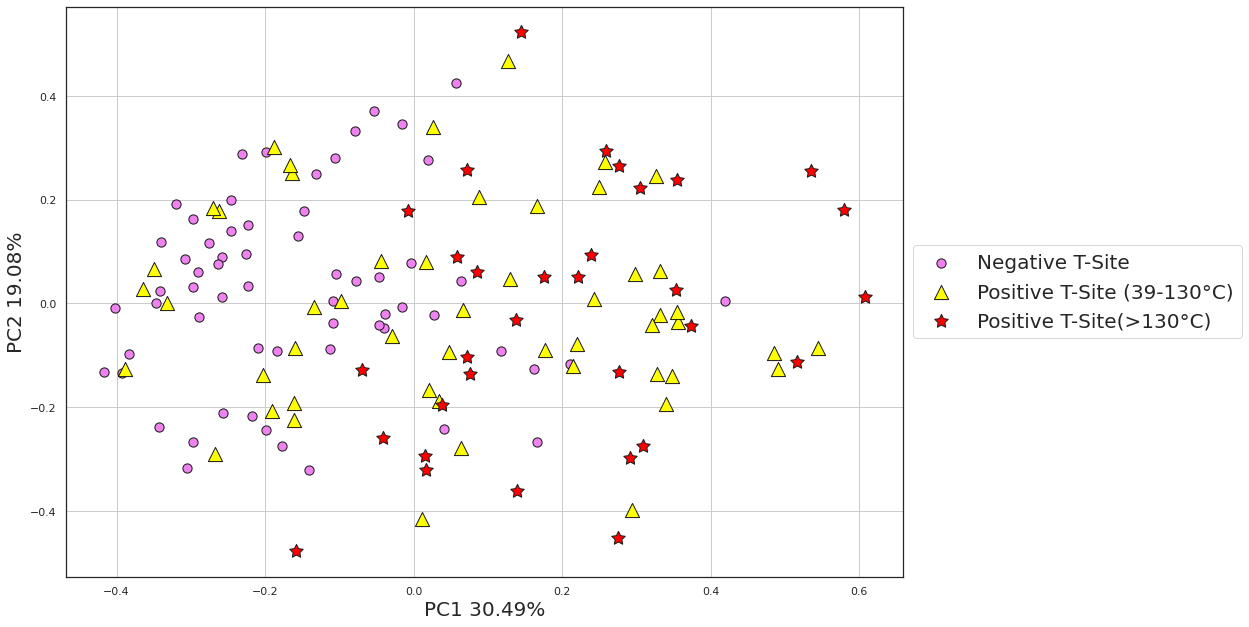

In [ ]:
#Plot data
fig= plt.figure(figsize=(15,10.5))

#Scale scores so that they range from 0 to 1
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

#scatter plot data in PC1 and PC2 space
plt.scatter(pca[df['TrainCodeNeg'] == 1,0]*scalex,pca[df['TrainCodeNeg'] == 1,1]*scalex, color='violet',edgecolors='k',s=85, label='Negative T-Site')
plt.scatter(pca[df['TrainCodePosT37'] == 1,0]*scaley,pca[df['TrainCodePosT37'] == 1,1]*scaley, color='yellow',edgecolors='k',s=200,marker='^',label='Positive T-Site (39-130°C)')
plt.scatter(pca[df['TrainCodePosT130'] == 1,0]*scaley,pca[df['TrainCodePosT130'] == 1,1]*scaley, color='red',edgecolors='k',s=200,marker=(5, 1),label='Positive T-Site(>130°C)')

#Plot X and Y axes with variance ratios
var_ratio1 = float(str(round(pcamodel.explained_variance_ratio_[0]*100, 2)))
var_ratio2 = float(str(round(pcamodel.explained_variance_ratio_[1]*100, 2)))

plt.xlabel('PC1 ' + str(var_ratio1) + '%',fontsize=20)
plt.ylabel('PC2 ' + str(var_ratio2) + '%',fontsize=20)

plt.grid()
plt.legend(scatterpoints=1,loc='center left',bbox_to_anchor=(1, 0.5),fontsize=20)

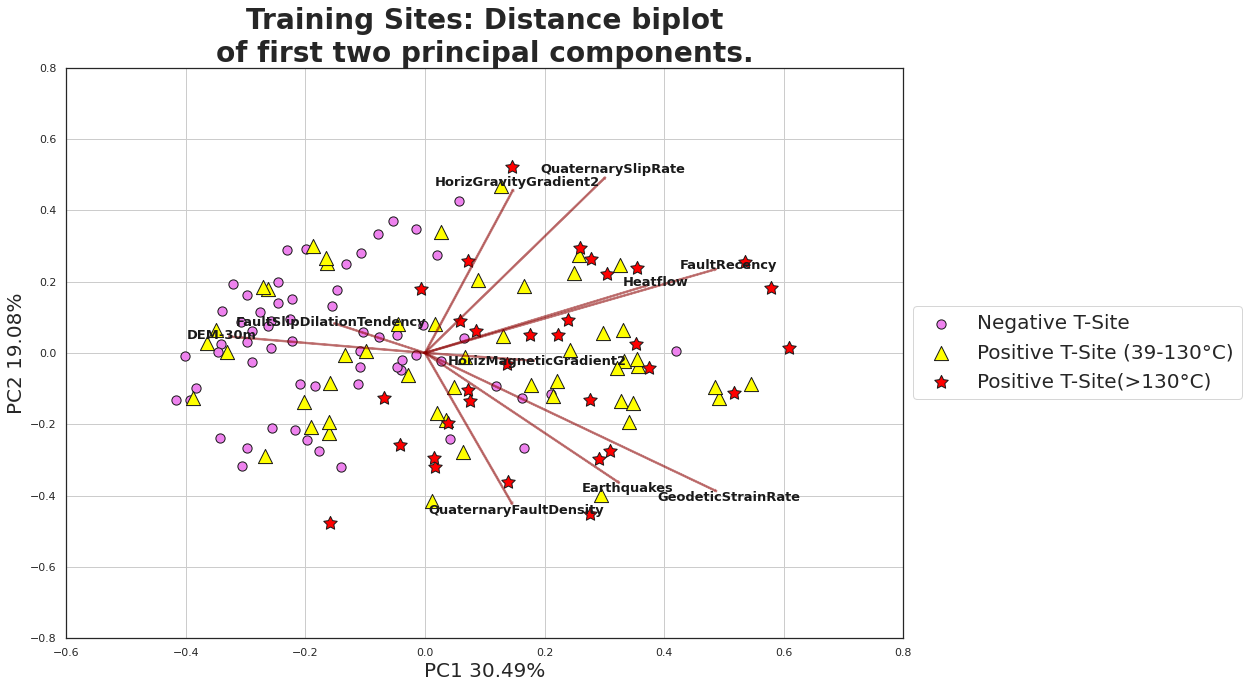

<function matplotlib.pyplot.tight_layout>

In [ ]:
#Plot data
fig= plt.figure(figsize=(15,10.5))

#Scale scores so that they range from 0 to 1
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

#scatter plot data in PC1 and PC2 space
plt.scatter(pca[df['TrainCodeNeg'] == 1,0]*scalex,pca[df['TrainCodeNeg'] == 1,1]*scalex, color='violet',edgecolors='k',s=85, label='Negative T-Site')
plt.scatter(pca[df['TrainCodePosT37'] == 1,0]*scaley,pca[df['TrainCodePosT37'] == 1,1]*scaley, color='yellow',edgecolors='k',s=200,marker='^',label='Positive T-Site (39-130°C)')
plt.scatter(pca[df['TrainCodePosT130'] == 1,0]*scaley,pca[df['TrainCodePosT130'] == 1,1]*scaley, color='red',edgecolors='k',s=200,marker=(5, 1),label='Positive T-Site(>130°C)')

#include feature loading vectors
VectorPlot(score,np.transpose(pcamodel.components_[0:2 :]),list(X.columns))

#define the x and y dimensions of plot (makes plot look nicer)
plt.xlim([-0.6, 0.8])
plt.ylim([-0.8, 0.8]) 

#Plot X and Y axes with variance ratios
var_ratio1 = float(str(round(pcamodel.explained_variance_ratio_[0]*100, 2)))
var_ratio2 = float(str(round(pcamodel.explained_variance_ratio_[1]*100, 2)))

plt.xlabel('PC1 ' + str(var_ratio1) + '%',fontsize=20)
plt.ylabel('PC2 ' + str(var_ratio2) + '%',fontsize=20)

plt.grid()
plt.legend(scatterpoints=1,loc='center left',bbox_to_anchor=(1, 0.5),fontsize=20)
plt.title(r"Training Sites: Distance biplot" + "\n" + "of first two principal components.",fontsize=28,fontweight='bold')

plt.show()
plt.tight_layout

##Try out a clustering method!

In [ ]:
First2PCs = score

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


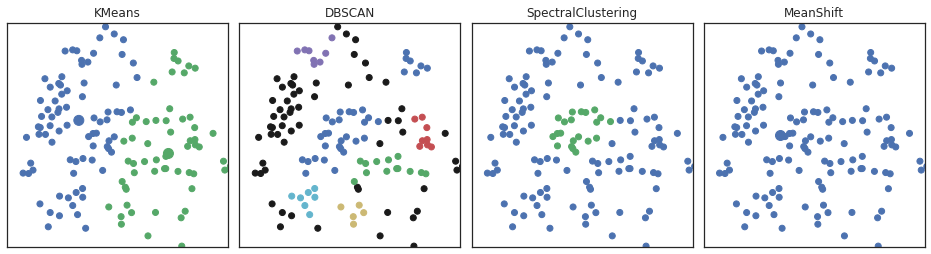

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
#from sklearn.cluster import Ward
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_circles, make_moons, make_blobs
#from sklearn.preprocessing import Scaler


colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 5)

plt.figure(figsize=(16, 10))
plt.subplots_adjust(left=.001, right=.999, bottom=.01, top=.95, wspace=.05,
        hspace=.01)

plot_num = 1
for i_dataset, dataset in enumerate([First2PCs]):
    First2PCs = dataset
    # normalize dataset for easier parameter selection
    First2PCs = StandardScaler().fit_transform(First2PCs)

    # estimate bandwidth for mean shift
    bandwidth = estimate_bandwidth(First2PCs, quantile=0.3)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(First2PCs, n_neighbors=20)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)


    # create clustering estimators
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = KMeans(n_clusters=2)
    #ward_five = Ward(n_clusters=2, connectivity=connectivity)
    spectral = SpectralClustering(n_clusters=2)
    dbscan = DBSCAN(eps=.3)

    for algorithm in [two_means, dbscan, spectral, ms]:
        # predict cluster memberships
        if algorithm == spectral:
            algorithm.fit(connectivity)
        else:
            algorithm.fit(First2PCs)
        y_pred = algorithm.labels_.astype(np.int)

        # plot
        plt.subplot(3, 5, plot_num)
        if i_dataset == 0:
            plt.title(str(algorithm).split('(')[0])
        plt.scatter(First2PCs[:, 0], First2PCs[:, 1], color=colors[y_pred].tolist())

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.show()

### **Kmeans Analysis**

Steps


*   Perform reconstruction to find optimal k
*   Fit truncated PCA data to k-means model
*   Visualize clusters

for More check out: https://sklearn.org/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Create a new dataframe (Tsite_pca) with all features and PC scores

pcaTsite_df = pd.DataFrame(pca,columns=[ "PC"+str(X) for X in range(1,pcamodel.n_components_+1)])
Tsite_pca = pd.concat([df,pcaTsite_df], axis=1, sort=False)
Tsite_pca.head()

,Id,QuaternaryFaultDensity,HorizGravityGradient2,GeodeticStrainRate,QuaternarySlipRate,FaultRecency,FaultSlipDilationTendency,Earthquakes,HorizMagneticGradient2,Heatflow,DEM-30m,X_83UTM11,Y_83UTM11,TrainCodeNeg,TrainCodePos,TrainCodePosT130,TrainCodePosT37,NAME,MAX_MAXT,Blind,POWER,E_utm83,N_utm83,Depth(m),PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,6,1.285103,-1.179981,1.327701,-0.875585,-1.595637,0.116588,0.187495,1.161904,0.765071,-0.387379,325827.6902,4261213.766,12,1,12,1,Grant View Hot Springs,53.0,no,0.0,325910.7938,4261123.388,NaN,0.078309,-2.779964,0.658617,0.130603,1.528482,-1.483535,1.072615,0.153166,0.267197,0.434741
1,78,0.200934,3.224230,0.042698,0.925116,-0.450002,-0.557711,0.779572,-0.095253,-1.670693,-0.949648,626327.6902,4262713.766,12,1,1,12,Bacon Flat,130.0,yes,0.0,626240.6513,4262689.377,NaN,0.389134,0.595632,-3.058334,-1.060005,-0.851382,-0.061835,0.395228,0.006700,0.151313,-0.279579
2,27,0.530642,0.346868,1.670390,2.105045,0.760399,-0.140574,2.492251,1.213427,0.415872,-1.109560,356327.6902,4263213.766,12,1,12,1,Hawthorne 1,97.0,yes,0.0,356239.0985,4263285.061,NaN,3.287873,-0.847101,-0.029748,-1.211373,-0.838931,-1.594129,0.773959,-0.545851,-0.596717,-0.038647
3,82,2.520683,-0.845162,-0.276014,-0.920538,-1.178281,-0.632902,1.053704,-0.589872,-1.448916,-0.250680,555077.6902,4263713.766,12,1,1,12,Hot Creek Ranch Hot Spr,160.0,no,0.0,555117.5865,4263714.281,NaN,-1.064685,-3.198444,-0.459950,0.309630,-0.977705,0.263885,1.572713,-0.221064,-0.019030,-0.622020
4,31,0.328629,3.224230,0.004236,0.698215,-0.420560,-0.177550,0.706009,-0.899009,-1.639976,-0.923856,628327.6902,4269213.766,12,1,12,1,Blue Eagle Springs,41.0,no,0.0,628207.4400,4269285.723,NaN,0.113795,0.534545,-3.008227,-0.618248,-1.062806,0.185302,0.018564,-0.427695,0.541162,-0.326115


In [ ]:
"""Look at the percentage of variance explained by the first three or so components
We can make a rough estimate that if we explain ~60% or more of the data in the 
first few PCs we can truncate them""" 

perc = pcamodel.explained_variance_ratio_
print("Total contribution of 1st three components: {} %".format(np.sum(perc[:3])*100))

Total contribution of 1st three components: 65.34893626696181 %


In [ ]:
#Append distortions to list
distortions = []
for i in range(1, 9): #test cluster values from 1-9
    km = KMeans(n_clusters=i, init='k-means++') 
    #Fit K-means to the first PCs which explain the most variance
    km.fit(Tsite_pca[['PC1','PC2','PC3']])
    distortions.append(km.inertia_)

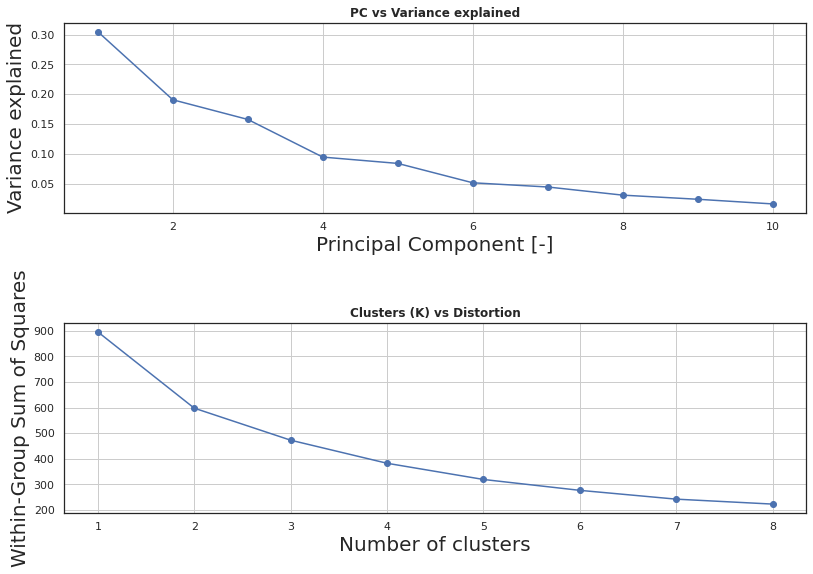

In [ ]:
#Visualize reconstruction factors 

plt.subplot(211)
startIndex = 0
plt.plot(range(1,len(pcamodel.explained_variance_ratio_ )+1),pcamodel.explained_variance_ratio_,marker='o')
plt.grid()
plt.xlabel('Principal Component [-]')
plt.ylabel('Variance explained')
plt.title('PC vs Variance explained',fontweight='bold')

K = range(1, 9)

plt.tight_layout
plt.subplot(212)
plt.plot(K,distortions,marker='o')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Within-Group Sum of Squares')
plt.title('Clusters (K) vs Distortion',fontweight='bold')
plt.tight_layout ()

We can see that 4 components produces a distinct elbow and that 3 clusters are representative of a gradual elbow


Aspects of the K-means model
*   n_clusters = pre-set number of clusters (k)
*   init = method for intilization (default k-means++ selects initial cluster centers) 
*   verbose = Print training process (set to 1 to visualize)

*   algorithm =algorithm to use (auto uses elkan for dense data and full for sparse)


*   n_init = number of times k-means run for different centroid seeds. 

*   tol = tolerance with reards to inertia to declare convergence


*   Other parameters are defaults and can be seen on the Scikit learn page





In [ ]:
nCluster = 3

Kmeans = KMeans(n_clusters=nCluster, init='k-means++',
               verbose=0, algorithm="auto")

Kmeans.fit(Tsite_pca[['PC1','PC2','PC3','PC4']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centers = np.copy(Kmeans.cluster_centers_)
print('centers.ndim: {}'.format(centers.ndim))
print('centers.shape: {}'.format(centers.shape))
print('centers.size: {}'.format(centers.size))
print(centers)

Labels = Kmeans.labels_

centers.ndim: 2
centers.shape: (3, 4)
centers.size: 12
[[-0.39131873  1.31640215 -0.68002499 -0.11309762]
 [-1.34389304 -0.72133376  0.29997999  0.01231409]
 [ 1.97119088 -0.27354178  0.22940778  0.08372552]]


In [ ]:
df_labels = pd.DataFrame({'KMeansGrp':Labels,
                          'Grp0_CntrX':centers[0,0],
                          'Grp0_CntrY':centers[0,1],
                          'Grp1_CntrX':centers[1,0],
                          'Grp1_CntrY':centers[1,1]},dtype=int)

df_out = pd.concat([Tsite_pca, df_labels], axis=1, sort=False)

print("Last 5 rows of df_out:", flush=True)
print(df_out.tail(5).to_string(), flush=True)
print('', flush=True)

Last 5 rows of df_out:
      Id  QuaternaryFaultDensity  HorizGravityGradient2  GeodeticStrainRate  QuaternarySlipRate  FaultRecency  FaultSlipDilationTendency  Earthquakes  HorizMagneticGradient2  Heatflow   DEM-30m    X_83UTM11    Y_83UTM11  TrainCodeNeg  TrainCodePos  TrainCodePosT130  TrainCodePosT37                    NAME   MAX_MAXT Blind  POWER      E_utm83      N_utm83     Depth(m)       PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9      PC10  KMeansGrp  Grp0_CntrX  Grp0_CntrY  Grp1_CntrX  Grp1_CntrY
140  129               -1.524225              -0.743702           -1.113649            2.177095      1.117178                   0.726471    -1.542368               -0.950532  0.323909  0.045930  654827.6902  4483713.766             1            12                12               12  Ruby Valley Unit No. 1 -64.323440   NaN    NaN  654886.8122  4483773.277  2743.199912 -0.550247  2.323506  2.561232 -0.292444 -0.980748 -0.287343  0.202692 -0.07490

In [ ]:
df_out['KMeansGrp'].unique()

array([1, 0, 2])

Oraganize clusters into groups

In [ ]:
group1 = df_out[(df_out['TrainCodePosT130'] == 1) & (df_out['KMeansGrp'] == 0)] #plot with star
group2 = df_out[(df_out['TrainCodePosT130'] == 12) & (df_out['TrainCodeNeg'] == 12) & (df_out['KMeansGrp'] == 0)] #plot with triangle
group3 = df_out[(df_out['TrainCodeNeg'] == 1) & (df_out['KMeansGrp'] == 0)]


group4 = df_out[(df_out['TrainCodePosT130'] == 1) & (df_out['KMeansGrp'] == 1)] #plot with star
group5 = df_out[(df_out['TrainCodePosT130'] == 12) & (df_out['TrainCodeNeg'] == 12) & (df_out['KMeansGrp'] == 1)]
group6 = df_out[(df_out['TrainCodeNeg'] == 1) & (df_out['KMeansGrp'] == 1)]

group7 = df_out[(df_out['TrainCodePosT130'] == 1) & (df_out['KMeansGrp'] == 2)] #plot with star
group8 = df_out[(df_out['TrainCodePosT130'] == 12) & (df_out['TrainCodeNeg'] == 12) & (df_out['KMeansGrp'] == 2)]
group9 = df_out[(df_out['TrainCodeNeg'] == 1) & (df_out['KMeansGrp'] == 2)]

In [ ]:
label1 = 'Positive T-Site(>130°C) - Cluster 1'
label2 = 'Positive T-Site (39-130°C) - Cluster 1'
label3 = 'Negative T-Site - Cluster 1'


label4 = 'Positive T-Site(>130°C) - Cluster 2'
label5 = 'Positive T-Site (39-130°C) - Cluster 2'
label6 = 'Negative T-Site - Cluster 2'

label7 = 'Positive T-Site (>130°C) - Cluster 3'
label8 = 'Positive T-Site (39-130°C) - Cluster 3'
label9 = 'Negative T-Site - Cluster 3'

In [ ]:
#ADD VECTORS
def VectorPlot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*10, coeff[i,1]*10,color = 'darkred',alpha = 0.5, lw = 2 ) #MULTIPLY BY 10
        if labels is None:
            plt.text(coeff[i,0]* 10.05, coeff[i,1] * 10.05, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',)

        else:
            plt.text(coeff[i,0]* 10.05, coeff[i,1] * 10.05, labels[i], color = 'k', ha = 'center', va = 'center',fontsize=13,fontweight='bold')
 

In [ ]:
from scipy.spatial.distance import cdist

#ADD ELLIPSES
"""The radius of each circle is the distance between the centroid and points in
each cluster, either the min, mean, or max dist of the collection of points"""

def plot_kmeans(kmeans, X, n_clusters=3, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    ax = ax or plt.gca()

    centers = kmeans.cluster_centers_ 
    radii = [cdist(X[labels == i], [center]).mean()*0.75 #Mean distance
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='white',ec =('r'), lw=3, alpha = 0.3, zorder=.1))

TO DO: Try and include a vector plot below! 


VectorPlot(score,np.transpose(pcamodel.components_[0:2, :]),list(X.columns))

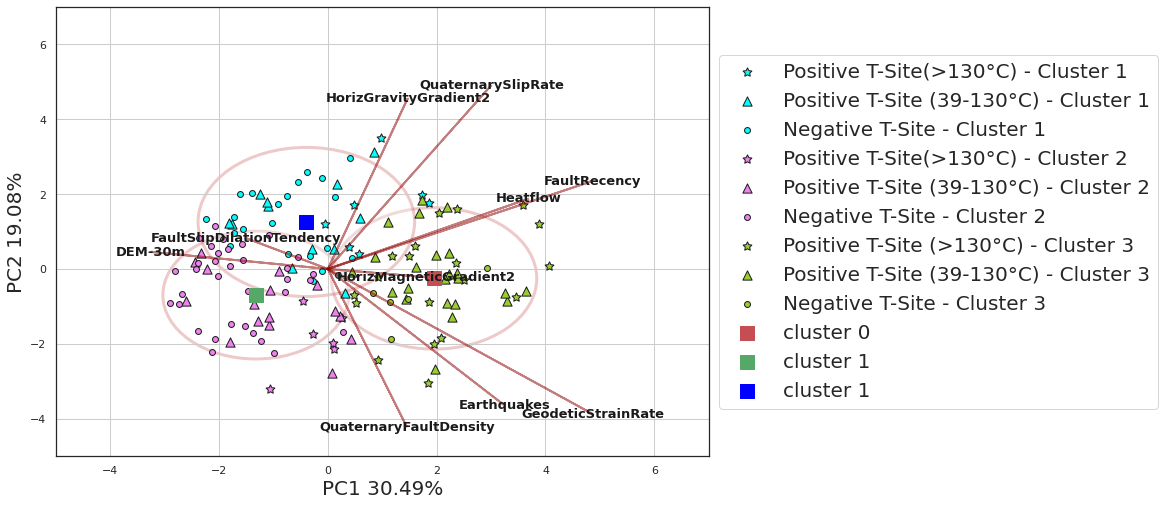

In [ ]:
plt.scatter(group1['PC1'], group1['PC2'], c='cyan',edgecolors='k',s=85,marker=(5, 1), label=label1)
plt.scatter(group2['PC1'], group2['PC2'], c='cyan',edgecolors='k',s=85, marker='^',label=label2)            
plt.scatter(group3['PC1'], group3['PC2'], c='cyan',edgecolors='k',s=35, marker='o',label=label3)
            
plt.scatter(group4['PC1'], group4['PC2'], c='violet' ,edgecolors='k',s=85, marker=(5, 1), label=label4)   
plt.scatter(group5['PC1'], group5['PC2'], c='violet',edgecolors='k',s=85, marker='^',label=label5)
plt.scatter(group6['PC1'], group6['PC2'], c='violet',edgecolors='k',s=35, marker='o',label=label6)            

plt.scatter(group7['PC1'], group7['PC2'], c='yellowgreen',edgecolors='k',s=85, marker=(5, 1),label=label7)
plt.scatter(group8['PC1'], group8['PC2'], c='yellowgreen',edgecolors='k',s=85, marker='^',label=label8)     
plt.scatter(group9['PC1'], group9['PC2'], c='yellowgreen',edgecolors='k',s=35, marker='o',label=label9)

plt.xlabel('PC1 ' + str(var_ratio1) + '%',fontsize=20)
plt.ylabel('PC2 ' + str(var_ratio2) + '%',fontsize=20)


plt.xlim([-5, 7])
plt.ylim([-5, 7]) 

plt.grid()

kmeans = KMeans(n_clusters=3, random_state=42)

plot_kmeans(kmeans, pca) # hash out to turn off ellipses

VectorPlot(score,np.transpose(pcamodel.components_[0:2, :]),list(X.columns))

#Plot Kmeans center locations
cc = kmeans.cluster_centers_
plt.scatter(cc[1][0], cc[1][1], s=200, c='r', marker='s',label = 'cluster 0')
plt.scatter(cc[0][0], cc[0][1], s=200, c='g', marker='s',label = 'cluster 1')
plt.scatter(cc[2][0], cc[2][1], s=200, c='blue', marker='s',label = 'cluster 1')




plt.legend(scatterpoints=1,loc='center left',bbox_to_anchor=(1, 0.5),fontsize=20)

###Save Data as csv - import into  arcgis

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df_out.to_csv('TSite_PCA_data.csv')

# Manifold Learning (Nonlinear dimensionality reduction

In [ ]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(145, 145)

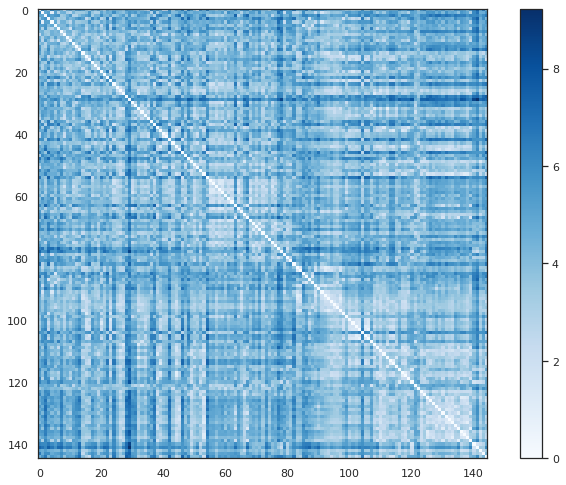

In [ ]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

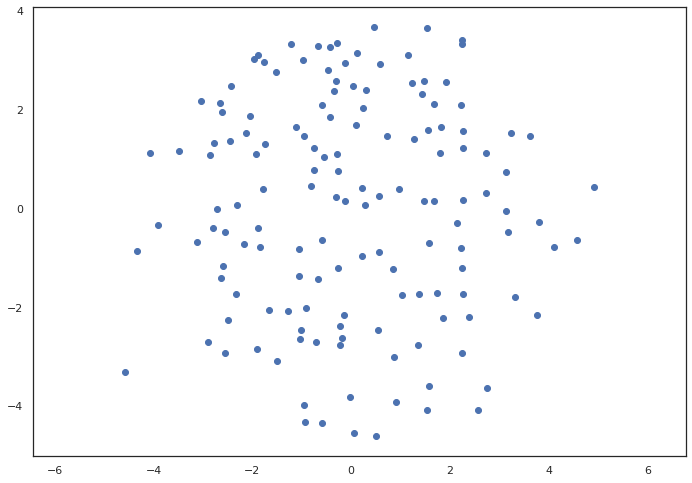

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1])
plt.axis('equal');